In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

### Loading the data

In [2]:
basepath = '../data_swh/top100'
output_path = '/../results'

fpath = basepath + '/all_data.json'

In [3]:
# read each line of the file as a json object
data_json = []

with open(fpath) as f:
    data_json = [json.loads(line) for line in f]

len(data_json)

890

In [4]:
p_ids = set(p['project_id'] for p in data_json)
len(p_ids)

835

### DataFrame creation
In this notebook, we refer to multi-class licensing with the term "mismatch"

In [5]:
# retrieve the data for each project
ids, language, keywords, n_files, n_licenses, n_unique_licenses, n_mismatches, n_conflicts = [], [], [], [], [], [], [], []
avg_licenses_per_file, avg_unique_licenses_per_file, avg_mismatches_per_file, avg_conflicts_per_file = [], [], [], []

for p in data_json:
    
    ids.append(p['project_id'])

    project_main_language = p['project_main_language']

    if type(project_main_language) == list:
        project_main_language = 'other'

    language.append(project_main_language)
    keywords.append(p['project_keywords'])
    n_files.append(p['n_project_files'])
    n_licenses.append(p['n_project_declared_licenses']+p['n_project_incode_licenses'])
    n_unique_licenses.append(len(p['project_declared_licenses'])+len(p['project_incode_licenses']))
    n_mismatches.append(sum(p['between_declared_mismatches'].values())  + sum(p['between_incode_mismatches'].values()) + sum(p['between_declared_incode_mismatches'].values()))

    tot_conflicts = 0
    tot_conflicts += sum(p['between_declared_conflicts'].values()) + sum(p['possible_between_declared_conflicts'].values())
    tot_conflicts += sum(p['between_incode_conflicts'].values()) + sum(p['possible_between_incode_conflicts'].values())
    tot_conflicts += sum(p['between_declared_incode_conflicts'].values()) + sum(p['possible_between_declared_incode_conflicts'].values())

    n_conflicts.append(tot_conflicts)

    avg_licenses_per_file.append((p['n_project_declared_licenses']+p['n_project_incode_licenses'])/p['n_project_files'])
    avg_unique_licenses_per_file.append((len(p['project_declared_licenses'])+len(p['project_incode_licenses']))/p['n_project_files'])
    avg_mismatches_per_file.append((sum(p['between_declared_mismatches'].values())  + sum(p['between_incode_mismatches'].values()) + sum(p['between_declared_incode_mismatches'].values()))/p['n_project_files'])
    avg_conflicts_per_file.append(tot_conflicts/p['n_project_files'])

In [6]:
# create a dataframe with the data
df = pd.DataFrame({
        'project_id': ids, 
        'language': language, 
        'keywords': keywords, 
        'n_files': n_files, 
        'n_licenses': n_licenses,
        'avg_licenses_per_file': avg_licenses_per_file,
        'n_unique_licenses': n_unique_licenses, 
        'avg_unique_licenses_per_file': avg_unique_licenses_per_file,
        'n_mismatches': n_mismatches, 
        'avg_mismatches_per_file': avg_mismatches_per_file,
        'n_conflicts': n_conflicts,
        'avg_conflicts_per_file': avg_conflicts_per_file
    }
)

In [7]:
df.head()

,project_id,language,keywords,n_files,n_licenses,avg_licenses_per_file,n_unique_licenses,avg_unique_licenses_per_file,n_mismatches,avg_mismatches_per_file,n_conflicts,avg_conflicts_per_file
0,b605819d7976bb2abc1502f1dd0e0f4e86da3301,Java,"[java, spring-boot, spring, framework]",9261,7562,0.816542,6,0.000648,9,0.000972,12,0.001296
1,967e04d66c94a4858b65bfee67349c611f5c669b,TypeScript,"[react, ui-kit, typescript, antd, ant-design, ...",3713,2,0.000539,1,0.000269,0,0.000000,0,0.000000
2,1b14ddaab8a888d31bc8b56de46497453ea35b40,Rich Text Format,"[learn-to-code, git, github, app]",9490,1,0.000105,1,0.000105,0,0.000000,0,0.000000
3,b21667cbe0767257069d8af34424fc411760e350,Python,"[python, algorithm, algorithms-implemented, al...",1347,29,0.021529,4,0.002970,4,0.002970,4,0.002970
4,fe9da48099456119bf5f803518b6d2511106661a,JavaScript,"[javascript, react, frontend, declarative, ui,...",2358,1521,0.645038,4,0.001696,5,0.002120,5,0.002120


In [8]:
# get the number of rows and columns
df.shape

(890, 12)

### Basic stats about programming languages

In [9]:
# group by language and count how many rows per language
n_projects_per_lang = df.groupby('language')['project_id'].count()

In [10]:
n_projects_per_lang

language
C                    92
C#                    2
C++                  10
CSS                   2
Clojure               1
Dart                  2
Dockerfile            1
Go                    8
Groovy                1
HTML                  7
Java                105
JavaScript          123
Julia                86
Jupyter Notebook      3
Kotlin               83
Markdown              2
PHP                   3
Python              116
R                    95
Rich Text Format      1
Ruby                  1
Rust                 84
SCSS                  1
Scala                 1
Shell                 7
TypeScript           20
Vim Script            1
Vue                   2
other                30
Name: project_id, dtype: int64

In [11]:
np.quantile(n_projects_per_lang.values, [0.25, 0.5, 0.75])

array([ 1.,  3., 83.])

In [12]:
# get all programming languages
languages = set(df['language'].tolist())
languages

{'C',
 'C#',
 'C++',
 'CSS',
 'Clojure',
 'Dart',
 'Dockerfile',
 'Go',
 'Groovy',
 'HTML',
 'Java',
 'JavaScript',
 'Julia',
 'Jupyter Notebook',
 'Kotlin',
 'Markdown',
 'PHP',
 'Python',
 'R',
 'Rich Text Format',
 'Ruby',
 'Rust',
 'SCSS',
 'Scala',
 'Shell',
 'TypeScript',
 'Vim Script',
 'Vue',
 'other'}

In [13]:
len(languages)

29

### Correlation between programming language and liceses usage, mismatches, and conflicts

In [19]:
languages = sorted(languages)
languages

['C',
 'C#',
 'C++',
 'CSS',
 'Clojure',
 'Dart',
 'Dockerfile',
 'Go',
 'Groovy',
 'HTML',
 'Java',
 'JavaScript',
 'Julia',
 'Jupyter Notebook',
 'Kotlin',
 'Markdown',
 'PHP',
 'Python',
 'R',
 'Rich Text Format',
 'Ruby',
 'Rust',
 'SCSS',
 'Scala',
 'Shell',
 'TypeScript',
 'Vim Script',
 'Vue',
 'other']

In [20]:
languages_analyzed = []

n_licenses_per_language = []
n_unique_licenses_per_language = []
n_mismatches_per_language = []
n_conflicts_per_language = []

avg_licenses_per_file_per_language = []
avg_unique_licenses_per_file_per_language = []
avg_mismatches_per_file_per_language = []
avg_conflicts_per_file_per_language = []

for i, language in enumerate(languages):
    print(i, language)
    _df = df[df['language'] == language]

    if len(_df) < 80 or language.lower() == 'other':
        continue

    languages_analyzed.append(language)

    _n_licenses = _df['n_licenses'].tolist()
    _n_unique_licenses = _df['n_unique_licenses'].tolist()
    _n_mismatches = _df['n_mismatches'].tolist()
    _n_conflicts = _df['n_conflicts'].tolist()

    _avg_licenses_per_file = _df['avg_licenses_per_file'].tolist()
    _avg_unique_licenses_per_file = _df['avg_unique_licenses_per_file'].tolist()
    _avg_mismatches_per_file = _df['avg_mismatches_per_file'].tolist()
    _avg_conflicts_per_file = _df['avg_conflicts_per_file'].tolist()

    n_licenses_per_language.append(_n_licenses)
    n_unique_licenses_per_language.append(_n_unique_licenses)
    n_mismatches_per_language.append(_n_mismatches)
    n_conflicts_per_language.append(_n_conflicts)

    avg_licenses_per_file_per_language.append(_avg_licenses_per_file)
    avg_unique_licenses_per_file_per_language.append(_avg_unique_licenses_per_file)
    avg_mismatches_per_file_per_language.append(_avg_mismatches_per_file)
    avg_conflicts_per_file_per_language.append(_avg_conflicts_per_file)

0 C
1 C#
2 C++
3 CSS
4 Clojure
5 Dart
6 Dockerfile
7 Go
8 Groovy
9 HTML
10 Java
11 JavaScript
12 Julia
13 Jupyter Notebook
14 Kotlin
15 Markdown
16 PHP
17 Python
18 R
19 Rich Text Format
20 Ruby
21 Rust
22 SCSS
23 Scala
24 Shell
25 TypeScript
26 Vim Script
27 Vue
28 other


In [21]:
languages_analyzed

['C', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Python', 'R', 'Rust']

In [22]:
# # sort alphabetically the languages
# languages_analyzed = sorted(languages_analyzed)
# languages_analyzed

['C', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Python', 'R', 'Rust']

In [23]:
# now we want to examine whether the use of a specific programming language
# is correlated with the number of licenses, mismatches, and conflicts

avg_h_statistic_n_licenses, avg_p_value_n_licenses = stats.kruskal(*avg_licenses_per_file_per_language)
print('N_licenses: ', avg_h_statistic_n_licenses, avg_p_value_n_licenses)

avg_h_statistic_n_unique_licenses, avg_p_value_n_unique_licenses = stats.kruskal(*avg_unique_licenses_per_file_per_language)
print('N_unique_licenses: ', avg_h_statistic_n_unique_licenses, avg_p_value_n_unique_licenses)

avg_h_statistic_n_mismatches, avg_p_value_n_mismatches = stats.kruskal(*avg_mismatches_per_file_per_language)
print('N_mismatches: ', avg_h_statistic_n_mismatches, avg_p_value_n_mismatches)

avg_h_statistic_n_conflicts, avg_p_value_n_conflicts = stats.kruskal(*avg_conflicts_per_file_per_language)
print('N_conflicts: ', avg_h_statistic_n_conflicts, avg_p_value_n_conflicts)

N_licenses:  149.1477272614274 6.13025530609846e-29
N_unique_licenses:  29.312324681681325 0.00012688900677597343
N_mismatches:  144.60972275866413 5.492949629157029e-28
N_conflicts:  149.79387106673238 4.4853933698375434e-29


#### Which group differ - average number of licenses per project? (NORMALIZED)

In [24]:
# now we want to know which groups are statistically different from each other
# we use the Mann-Whitney U test

alpha = 0.05

# n_licenses
for i in range(len(avg_licenses_per_file_per_language)):
    for j in range(i+1, len(avg_licenses_per_file_per_language)):
        print(languages_analyzed[i], languages_analyzed[j])
        h_statistic, p_value = stats.mannwhitneyu(avg_licenses_per_file_per_language[i], avg_licenses_per_file_per_language[j])

        print(h_statistic, p_value, len(avg_licenses_per_file_per_language[i]), len(avg_licenses_per_file_per_language[j]))

        if p_value < alpha:
            print('Significant')

        print('***')

C Java
4171.5 0.09932150634220648 92 105
***
C JavaScript
8004.5 2.0125766549635502e-07 92 123
Significant
***
C Julia
6770.5 2.584816514122638e-16 92 86
Significant
***
C Kotlin
3816.5 0.9976158026380346 92 83
***
C Python
7227.0 1.1595039234596949e-05 92 116
Significant
***
C R
7238.5 9.141833383303883e-15 92 95
Significant
***
C Rust
5661.0 1.0315456639510447e-07 92 84
Significant
***
Java JavaScript
9188.5 3.794854648506698e-08 105 123
Significant
***
Java Julia
7560.0 1.1491165399685127e-15 105 86
Significant
***
Java Kotlin
4995.5 0.0853033886587582 105 83
***
Java Python
8363.5 1.6807517022187454e-06 105 116
Significant
***
Java R
8140.5 1.2339119384516333e-14 105 95
Significant
***
Java Rust
6422.5 7.28274614290615e-08 105 84
Significant
***
JavaScript Julia
7274.5 3.954523799504079e-06 123 86
Significant
***
JavaScript Kotlin
3680.5 0.0006934322884330217 123 83
Significant
***
JavaScript Python
6977.5 0.7702583334570633 123 116
***
JavaScript R
7772.5 2.9359926123898343e-05 12

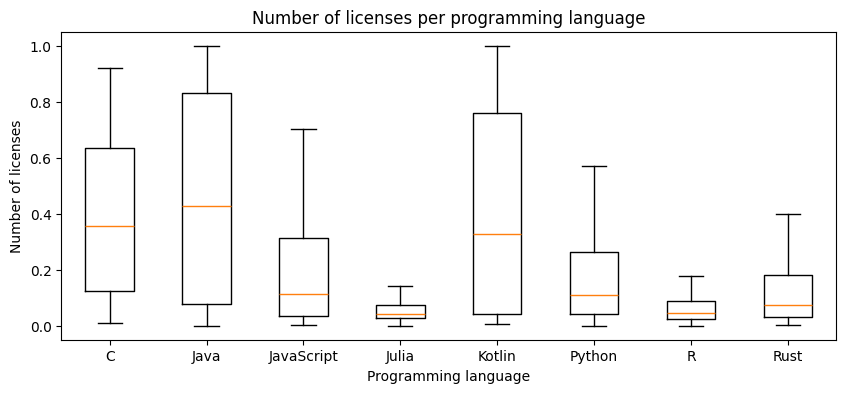

In [25]:
# Go Julia Rust Other Python JavaScript R C++ Java Kotlin C HTML Shell TypeScript
# plot the distribution of the number of licenses per language
# using boxplots

fig, ax = plt.subplots(figsize=(10, 4))

ax.boxplot(avg_licenses_per_file_per_language, labels=languages_analyzed, showfliers=False)

ax.set_ylabel('Number of licenses')
ax.set_xlabel('Programming language')
ax.set_title('Number of licenses per programming language');

#### Which group differ - average number of UNIQUE licenses per project? (NORMALIZED)

In [26]:
# now we want to know which groups are statistically different from each other
# we use the Mann-Whitney U test

alpha = 0.05

# n_licenses
for i in range(len(avg_unique_licenses_per_file_per_language)):
    for j in range(i+1, len(avg_unique_licenses_per_file_per_language)):
        print(languages_analyzed[i], languages_analyzed[j])
        h_statistic, p_value = stats.mannwhitneyu(avg_unique_licenses_per_file_per_language[i], avg_unique_licenses_per_file_per_language[j])

        print(h_statistic, p_value, len(avg_unique_licenses_per_file_per_language[i]), len(avg_unique_licenses_per_file_per_language[j]))

        if p_value < alpha:
            print('Significant')

        print('***')

C Java
5536.5 0.07699489183321175 92 105
***
C JavaScript
4627.5 0.02247549771683688 92 123
Significant
***
C Julia
3658.0 0.3864929620278934 92 86
***
C Kotlin
4271.5 0.1758512601847887 92 83
***
C Python
4611.0 0.09285401519306967 92 116
***
C R
4487.5 0.7518580280070268 92 95
***
C Rust
4422.5 0.09838093938165499 92 84
***
Java JavaScript
4626.0 0.0002257707447085008 105 123
Significant
***
Java Julia
3673.5 0.026925540214304718 105 86
Significant
***
Java Kotlin
4188.5 0.6492429478314481 105 83
***
Java Python
4629.0 0.002091706723928436 105 116
Significant
***
Java R
4469.5 0.20549157476800328 105 95
***
Java Rust
4346.0 0.8650689920336312 105 84
***
JavaScript Julia
5887.5 0.16455054208601927 123 86
***
JavaScript Kotlin
6497.0 0.0009094918718828786 123 83
Significant
***
JavaScript Python
7457.0 0.5460127934623923 123 116
***
JavaScript R
6985.0 0.013397481525197236 123 95
Significant
***
JavaScript Rust
6633.5 0.0005270826722172158 123 84
Significant
***
Julia Kotlin
4300.5 0.0

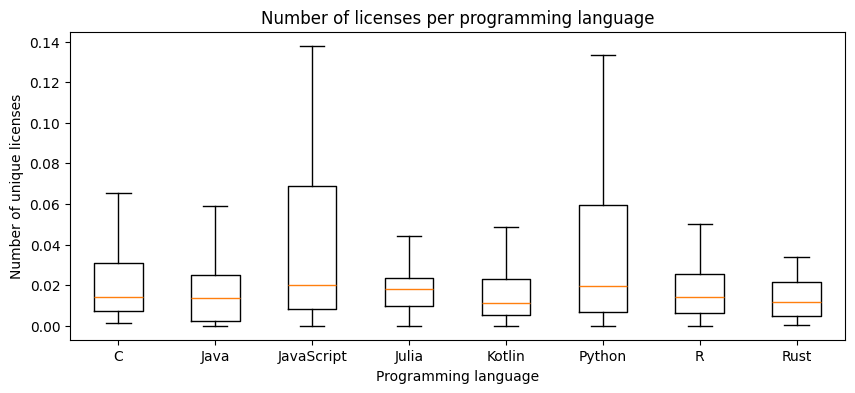

In [27]:
# Go Julia Rust Other Python JavaScript R C++ Java Kotlin C HTML Shell TypeScript
# plot the distribution of the number of licenses per language
# using boxplots

fig, ax = plt.subplots(figsize=(10, 4))

ax.boxplot(avg_unique_licenses_per_file_per_language, labels=languages_analyzed, showfliers=False)

ax.set_ylabel('Number of unique licenses')
ax.set_xlabel('Programming language')
ax.set_title('Number of licenses per programming language');

#### Which group differ - average number of mismatches per project? (NORMALIZED)

In [28]:
# now we want to know which groups are statistically different from each other
# we use the Mann-Whitney U test

alpha = 0.05

#n_mismatches
for i in range(len(avg_mismatches_per_file_per_language)):
    for j in range(i+1, len(avg_mismatches_per_file_per_language)):
        print(languages_analyzed[i], languages_analyzed[j])
        h_statistic, p_value = stats.mannwhitneyu(avg_mismatches_per_file_per_language[i], avg_mismatches_per_file_per_language[j])

        print(h_statistic, p_value, len(avg_mismatches_per_file_per_language[i]), len(avg_mismatches_per_file_per_language[j]))

        if p_value < alpha:
            print('Significant')

        print('***')

C Java
8099.5 9.874051141780651e-17 92 105
Significant
***
C JavaScript
8890.5 2.3919324666915544e-13 92 123
Significant
***
C Julia
6885.5 9.914244911685176e-19 92 86
Significant
***
C Kotlin
6240.0 3.7330607909532725e-13 92 83
Significant
***
C Python
8464.5 2.0016426710146715e-13 92 116
Significant
***
C R
7225.0 5.047997471944116e-15 92 95
Significant
***
C Rust
5575.0 3.936457472116605e-07 92 84
Significant
***
Java JavaScript
6270.0 0.687182089447131 105 123
***
Java Julia
5537.0 0.0027208127476521077 105 86
Significant
***
Java Kotlin
3474.5 0.014091050345548497 105 83
Significant
***
Java Python
5386.0 0.12030609796817916 105 116
***
Java R
4843.0 0.7092732416750347 105 95
***
Java Rust
2589.0 7.210957116773073e-07 105 84
Significant
***
JavaScript Julia
6441.5 0.00236410355776487 123 86
Significant
***
JavaScript Kotlin
4492.0 0.1282660849283342 123 83
***
JavaScript Python
6666.5 0.3537172703083069 123 116
***
JavaScript R
5919.5 0.8588720577694333 123 95
***
JavaScript Rust


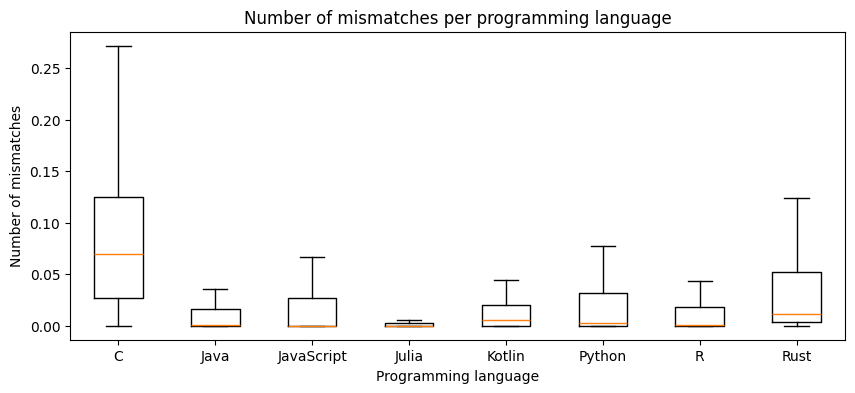

In [29]:
# Go Julia Rust Other Python JavaScript R C++ Java Kotlin C HTML Shell TypeScript
# plot the distribution of the number of mismatches per language
# using boxplots

fig, ax = plt.subplots(figsize=(10, 4))

ax.boxplot(avg_mismatches_per_file_per_language, labels=languages_analyzed, showfliers=False)

ax.set_ylabel('Number of mismatches')
ax.set_xlabel('Programming language')
ax.set_title('Number of mismatches per programming language');

#### Which group differ - average number of conflicts per project? (NORMALIZED)

In [30]:
# now we want to know which groups are statistically different from each other
# we use the Mann-Whitney U test

alpha = 0.05

#n_conflicts
for i in range(len(avg_conflicts_per_file_per_language)):
    for j in range(i+1, len(n_conflicts_per_language)):
        print(languages_analyzed[i], languages_analyzed[j])
        h_statistic, p_value = stats.mannwhitneyu(avg_conflicts_per_file_per_language[i], avg_conflicts_per_file_per_language[j])

        print(h_statistic, p_value, len(avg_conflicts_per_file_per_language[i]), len(avg_conflicts_per_file_per_language[j]))

        if p_value < alpha:
            print('Significant')

        print('***')

C Java
8124.0 6.137110231858866e-17 92 105
Significant
***
C JavaScript
9045.5 1.8232870995268023e-14 92 123
Significant
***
C Julia
6862.0 2.905286605111219e-18 92 86
Significant
***
C Kotlin
6213.5 6.93493693857875e-13 92 83
Significant
***
C Python
8600.0 1.7604942397912077e-14 92 116
Significant
***
C R
7400.5 6.850685170198284e-17 92 95
Significant
***
C Rust
5674.0 8.070165254353694e-08 92 84
Significant
***
Java JavaScript
6241.5 0.6444214807472153 105 123
***
Java Julia
5355.0 0.015283184272862923 105 86
Significant
***
Java Kotlin
3347.5 0.005142741107348738 105 83
Significant
***
Java Python
5424.5 0.14256576401814502 105 116
***
Java R
5213.0 0.5562271171475889 105 95
***
Java Rust
2573.0 5.885278890576396e-07 105 84
Significant
***
JavaScript Julia
6291.5 0.009483049874956531 123 86
Significant
***
JavaScript Kotlin
4383.0 0.07477762634706155 123 83
***
JavaScript Python
6720.0 0.4130533949084644 123 116
***
JavaScript R
6272.5 0.3139778951252997 123 95
***
JavaScript Rust


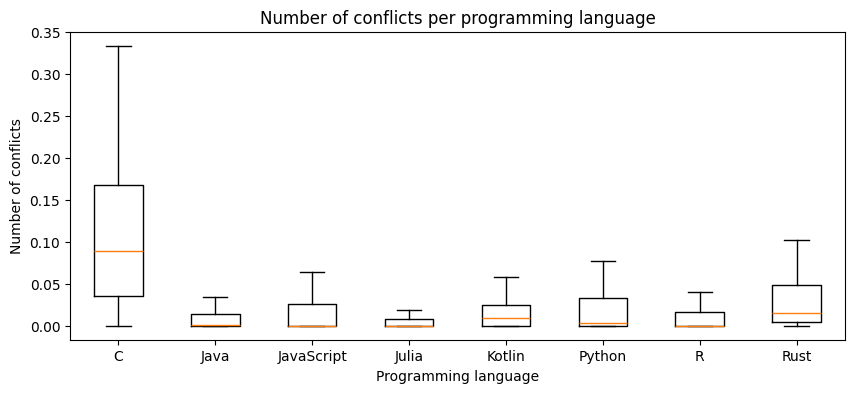

In [31]:
# Go Julia Rust Other Python JavaScript R C++ Java Kotlin C HTML Shell TypeScript
# plot the distribution of the number of conflicts per language
# using boxplots

fig, ax = plt.subplots(figsize=(10, 4))

ax.boxplot(avg_conflicts_per_file_per_language, labels=languages_analyzed, showfliers=False)

ax.set_ylabel('Number of conflicts')
ax.set_xlabel('Programming language')
ax.set_title('Number of conflicts per programming language');

In [36]:
languages_analyzed

['C', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Python', 'R', 'Rust']

In [32]:
# we only want to consider the languages that have at least 80 projects
# namely, C, Java, JavaScript, Julia, Kotlin, Python, R, and Rust
idxs_to_consider = [0, 1, 2, 3, 4, 5, 6, 7]

# filter the languages based on the above indices
_languages_analyzed= [languages_analyzed[i] for i in idxs_to_consider]
_avg_licenses_per_file_per_language = [avg_licenses_per_file_per_language[i] for i in idxs_to_consider]
_avg_unique_licenses_per_file_per_language = [avg_unique_licenses_per_file_per_language[i] for i in idxs_to_consider]
_avg_mismatches_per_file_per_language = [avg_mismatches_per_file_per_language[i] for i in idxs_to_consider]
_avg_conflicts_per_file_per_language = [avg_conflicts_per_file_per_language[i] for i in idxs_to_consider]

In [33]:
# zip the languages_analyzed with n_licenses_per_language, n_mismatches_per_language, and n_conflicts_per_language
# and sort them alphabetically
zipped = list(
    zip(
        _languages_analyzed, 
        _avg_licenses_per_file_per_language, 
        _avg_unique_licenses_per_file_per_language, 
        _avg_mismatches_per_file_per_language, 
        _avg_conflicts_per_file_per_language)
    )
zipped = sorted(zipped, key=lambda x: x[0])

In [34]:
pl_labels = [z[0] for z in zipped]
pl_n_licenses = [z[1] for z in zipped]
pl_n_unique_licenses = [z[2] for z in zipped]
pl_n_mismatches = [z[3] for z in zipped]
pl_n_conflicts = [z[4] for z in zipped]

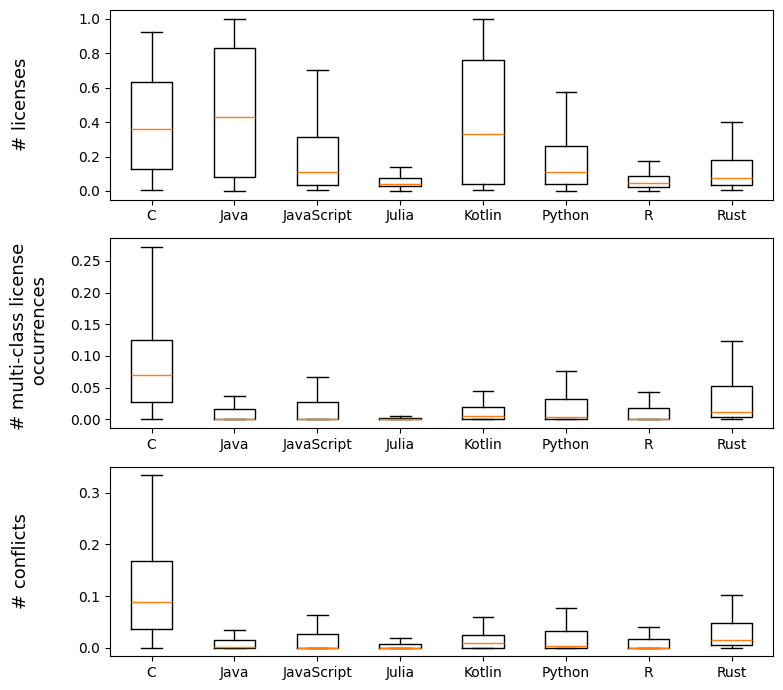

In [39]:
# I want to visualize all plots together
# using boxplots

fig, ax = plt.subplots(3, 1, figsize=(8, 7))

axs_size = 13

ax[0].boxplot(pl_n_licenses, labels=pl_labels, showfliers=False)
ax[0].xaxis.label.set_size(axs_size)
ax[0].yaxis.label.set_size(axs_size)
ax[0].set_ylabel('# licenses\n', labelpad=20)

ax[1].boxplot(pl_n_mismatches, labels=pl_labels, showfliers=False)
ax[1].xaxis.label.set_size(axs_size)
ax[1].yaxis.label.set_size(axs_size)
ax[1].set_ylabel('# multi-class license \n occurrences', labelpad=15)

ax[2].boxplot(pl_n_conflicts, labels=pl_labels, showfliers=False)
ax[2].xaxis.label.set_size(axs_size)
ax[2].yaxis.label.set_size(axs_size)
ax[2].set_ylabel('# conflicts\n', labelpad=20)

#ax[2].set_xlabel('Programming language')

#ax[0].set_title('Number of licenses, mismatches, and conflicts per programming language')

plt.tight_layout();
plt.savefig('number_licenses_mismatches_conflicts_per_language_rev2.png')